In [1]:
import pandas as pd
from bs4 import BeautifulSoup 
import requests
import re
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [ ]:
home_url = 'https://www.point2homes.com'

city_list_1 =['https://www.point2homes.com/US/Real-Estate-Listings/CA/Fremont.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Santa-Clara-County/Palo-Alto.html', 
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Santa-Clara-County/San-Jose.html', 
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Union-City.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Berkeley.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Santa-Clara-County/Milpitas.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Pleasanton.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/San-Mateo-County/San-Mateo.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Hayward.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Dublin.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/San-Ramon.html',
        'https://www.point2homes.com/US/Real-Estate-Listings/CA/Santa-Clara-County/Sunnyvale.html']

In [2]:
home_url = 'https://www.point2homes.com'

city_list_2 =['https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637472&LocationGeoAreaId=&Location=Fremont%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=599672&LocationGeoAreaId=&Location=Palo+Alto%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=599677&LocationGeoAreaId=&Location=San+Jose%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637791&LocationGeoAreaId=&Location=Union+City%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637475&LocationGeoAreaId=&Location=Berkeley%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=599683&LocationGeoAreaId=&Location=Milpitas%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637474&LocationGeoAreaId=&Location=Pleasanton%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=599344&LocationGeoAreaId=&Location=San+Mateo%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637470&LocationGeoAreaId=&Location=Hayward%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=637512&LocationGeoAreaId=&Location=Dublin%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=662340&LocationGeoAreaId=&Location=San+Ramon%2C+CA',
              'https://www.point2homes.com/US/Real-Estate-Listings.html?LocationGeoId=599681&LocationGeoAreaId=&Location=Sunnyvale%2C+CA']


In [3]:
# MAIN CODE
prop_d = []
for cityurl in city_list_2:
    text = requests.get(cityurl).text
    soup = BeautifulSoup(text,"html.parser")
    pagenumbers = soup.find('div',attrs={'class':"pager"}).text.replace("\t","").replace("\n","").replace("  ","")
    pagenumbers_list= list(pagenumbers)
    #print(pagenumbers_list)
    #pgnb=len(pagenumbers_list)
    #print(pgnb)
    
    for x in pagenumbers_list:
        
        urlwithpagenumber = cityurl+"?page="+str(x)#ADDING PAGE NUMBER TO URL
        #print(urlwithpagenumber)
        text = requests.get(urlwithpagenumber).text
        soup = BeautifulSoup(text,"html.parser")
        soup.prettify()
        content_list = soup.findAll('a',attrs={'data-label-more':"View More"})
        
        url_list =[]
        main_url = "https://www.point2homes.com"
        
        for tag in content_list:
            suburl= main_url + tag.attrs['href']#GETTING THE HOUSES URL FROM EACH PAGE
            url_list.append(suburl)  
        #print(len(url_list))
        distinct_url = list(set(url_list))
        #print(len(distinct_url))
        #print(distinct_url)
         
        for x in distinct_url:
            #print(x)
            htmlfile = requests.get(x).text
            soup = BeautifulSoup(htmlfile,'html.parser')
            soup.prettify()
            
            prop1={}
            
            # 1 - Address
            address = soup.find('div', attrs={'class': 'address-container'})
            
            if address:
                prop1['Address'] = soup.find('div', attrs={'class': 'address-container'}).text.replace("\r","").replace("\n","").replace("  ","")
            else:
                prop1['Address'] = "NA"
                
            
            #2 - Beds
            bed = soup.find('li', attrs={'data-label': 'Beds'})
            
            if bed:
                prop1['Beds'] = soup.find('li', attrs={'data-label': 'Beds'}).strong.text
                
            else:
                prop1['Beds'] = "NA"
                
            #3 - Bath
            bath = soup.find('li', attrs={'data-label': 'Baths'})
            
            if bath:
                prop1['Bath'] = soup.find('li', attrs={'data-label': 'Baths'}).strong.text
                
            else:
                prop1['Bath'] = "NA"       
                
            #4 - Size
            size = soup.find('li', attrs={'data-label': 'Sqft'})
            
            if size:
                prop1['Size Sqft'] = soup.find('li', attrs={'data-label': 'Sqft'}).strong.text
                
            else:
                prop1['Size Sqft'] = "NA" 
                
             #5 - Lot-size
            lot_size = soup.find('li', attrs={'data-label': 'Lot Size'})
            
            if lot_size:
                prop1['Lot Size'] = soup.find('li', attrs={'data-label': 'Lot Size'}).strong.text
                
            else:
                prop1['Lot Size'] = "NA" 
                
            # 6- Agent Name
                
            listing = soup.find('div', attrs={'class': 'agent-name'})

            if listing:
                prop1['Agent Name'] = soup.find('div', attrs={'class': 'agent-name'}).span.text. replace("  ","")
                
            else:
                prop1['Agent Name'] = "NA"  

            # 7 - Agent Company
                
            listing1 = soup.find('div', attrs={'class': 'agent-details-top'})
            
            if listing1:
                prop1['Agent Company'] = soup.find('div', attrs={'class': 'agent-details-top'}).p.text
                
            else:
                prop1['Agent Company'] = "NA"  

            #8 - Price

            price = soup.find('span', attrs={'class': 'green'})

            if price:
                prop1['Price'] = soup.find('span', attrs={'class': 'green'}).text.replace("  ","").replace("\r","").replace("\n","")
                
            else:
                prop1['Price'] = "NA"  
                
            #9 - Transport scores
            
            walk_sc =soup.find('div', attrs={'class':'walkscore-item walkscore-ic1'})
            
            if  walk_sc:
                prop1['Walk Score'] = soup.find('div', attrs={'class':'walkscore-item walkscore-ic1'}).span.text
                
            else:
                prop1['Walk Score'] = "NA"
            
            transit_sc =soup.find('div', attrs={'class':'walkscore-item walkscore-ic2'})
            
            if transit_sc:
                prop1['Transit Score'] = soup.find('div', attrs={'class':'walkscore-item walkscore-ic2'}).span.text
                
            else:
                prop1['Transit Score'] = "NA"
            
            bike_sc =soup.find('div', attrs={'class':'walkscore-item walkscore-ic3'})
            
            if bike_sc:
                prop1['Bike Score'] = soup.find('div', attrs={'class':'walkscore-item walkscore-ic3'}).span.text
                
            else:
                prop1['Bike Score'] = "NA" 
            
            prop_d.append(prop1)
            
df1 = pd.DataFrame(prop_d)
df1

,Address,Beds,Bath,Size Sqft,Lot Size,Agent Name,Agent Company,Price,Walk Score,Transit Score,Bike Score
0,"5615 Greeley PL, Fremont, Alameda County, CA, ...",3,2,"1,108",0.137 ac,Cindy Liu,Starriver Inc,"$1,298,000 USD",49,35,44
1,"38566 Acacia St, Fremont, Alameda County, CA, ...",3,2,"1,492",0.15 ac,Jill Denton,"eXp Realty of California, Inc","$1,449,000 USD",81,58,73
2,"5349 Audubon Park CT, Fremont, Alameda County,...",4,3,"1,581",0.206 ac,Scott Perry,KW Bay Area Estates,"$1,575,000 USD",45,32,48
3,"4103 Tawny TER, Fremont, Alameda County, CA, 9...",3,3,"1,549",2.34 ac,Terri Brown,Compass,"$1,198,000 USD",72,41,52
4,"762 Ridgeview Ter, Fremont, Alameda County, CA...",2,2,"1,001",0.09 ac,Marie Rice,Legacy Real Estate & Assoc.,"$998,500 USD",23,53,63
...,...,...,...,...,...,...,...,...,...,...,...
841,"1241 Heatherstone WAY, Sunnyvale, Santa Clara ...",2,1,"1,002",0.129 ac,Anson Ip,Compass,"$1,759,800 USD",62,41,89
842,"1225 Vienna Drive #302 , Sunnyvale, Santa Clar...",3,2,"1,616",NA,Janet Wooldridge,Ideal Homes,"$350,000 USD",39,42,72
843,"1268-2 Poplar AVE, Sunnyvale, Santa Clara Coun...",3,3,"1,667",0.089 ac,Hiep K. Nguyen,Christie's International Real Estate Sereno,"$2,380,000 USD",69,42,72
844,"1220 Tasman Dr #271, Sunnyvale, Santa Clara Co...",2,2,"1,319",NA,Alliance Manufactured Homes,Alliance Manufactured Homes,"$299,000 USD",59,49,78


In [4]:
import csv
df1.to_csv("property_data_sep22.csv")

In [5]:
# Create data frame from the heart data set. 
prop_df = pd.read_csv('property_data_sep22.csv')

# Determine dimensions of dataframe. 
prop_df.shape

(846, 12)

# Data Cleaning

In [6]:
prop_df.dtypes

Unnamed: 0         int64
Address           object
Beds               int64
Bath             float64
Size Sqft         object
Lot Size          object
Agent Name        object
Agent Company     object
Price             object
Walk Score       float64
Transit Score    float64
Bike Score       float64
dtype: object

In [7]:
df = prop_df.rename(columns={"Size Sqft": "Size_sqft", "Lot Size": "Lot_Size", "Agent Name": "Agent_Name ", "Agent Company": "Agent_Company","Walk Score": "Walk_Score", "Transit Score": "Transit_Score", "Bike Score": "Bike_Score" })

In [8]:
df.dtypes

Unnamed: 0         int64
Address           object
Beds               int64
Bath             float64
Size_sqft         object
Lot_Size          object
Agent_Name        object
Agent_Company     object
Price             object
Walk_Score       float64
Transit_Score    float64
Bike_Score       float64
dtype: object

In [9]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(0, 12)


In [10]:
df.count()

Unnamed: 0       846
Address          846
Beds             846
Bath             846
Size_sqft        834
Lot_Size         581
Agent_Name       846
Agent_Company    846
Price            846
Walk_Score       844
Transit_Score    588
Bike_Score       844
dtype: int64

In [11]:
# Finding the null values.
print(df.isnull().sum())

Unnamed: 0         0
Address            0
Beds               0
Bath               0
Size_sqft         12
Lot_Size         265
Agent_Name         0
Agent_Company      0
Price              0
Walk_Score         2
Transit_Score    258
Bike_Score         2
dtype: int64


In [12]:
df1=df.fillna(0)

In [13]:
print(df1.isnull().sum())

Unnamed: 0       0
Address          0
Beds             0
Bath             0
Size_sqft        0
Lot_Size         0
Agent_Name       0
Agent_Company    0
Price            0
Walk_Score       0
Transit_Score    0
Bike_Score       0
dtype: int64


In [14]:
import csv
df1.to_csv("property_data_sep22_final.csv")

In [15]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0       422.50
Beds               1.00
Bath               1.00
Walk_Score        30.00
Transit_Score     42.00
Bike_Score        25.75
dtype: float64


In [16]:
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.shape

/var/folders/9c/kkxrxr9j74930ptyn4f4fvsh0000gn/T/ipykernel_1108/689747575.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


(788, 12)

<AxesSubplot:xlabel='Transit_Score'>

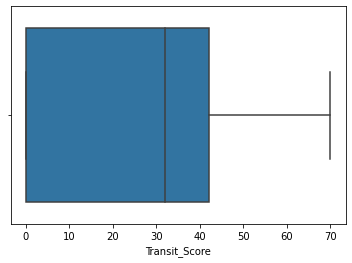

In [17]:
sns.boxplot(x=df2['Transit_Score'])

<AxesSubplot:xlabel='Beds'>

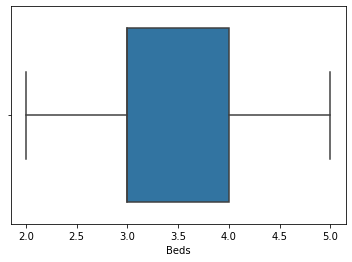

In [18]:
sns.boxplot(x=df2['Beds'])

<AxesSubplot:xlabel='Bath'>

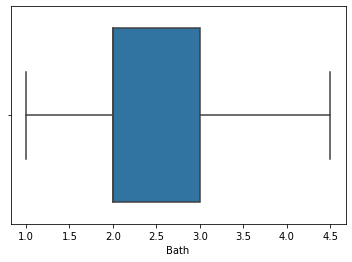

In [19]:
sns.boxplot(x=df2['Bath'])

<AxesSubplot:xlabel='Walk_Score'>

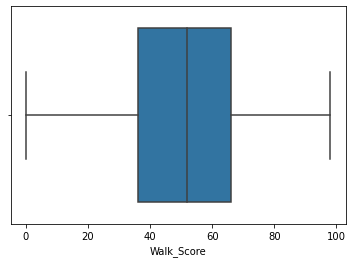

In [20]:
sns.boxplot(x=df2['Walk_Score'])

<AxesSubplot:xlabel='Bike_Score'>

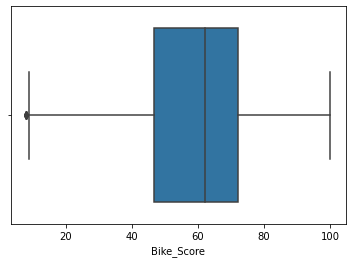

In [21]:
sns.boxplot(x=df2['Bike_Score'])

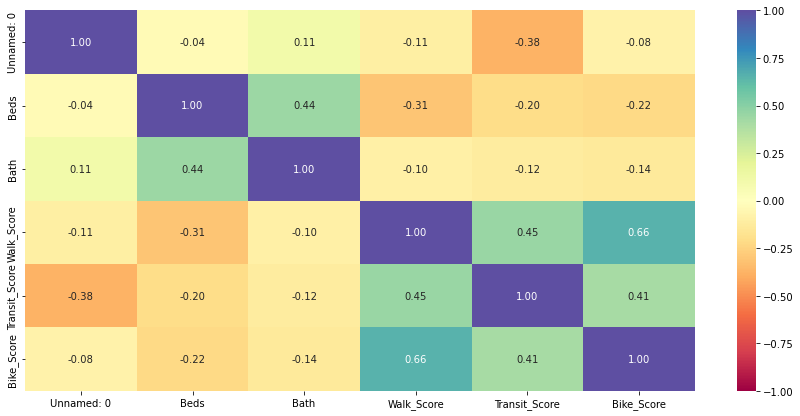

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()